In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification

In [8]:
x_train_69, y_train_69 = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=10)

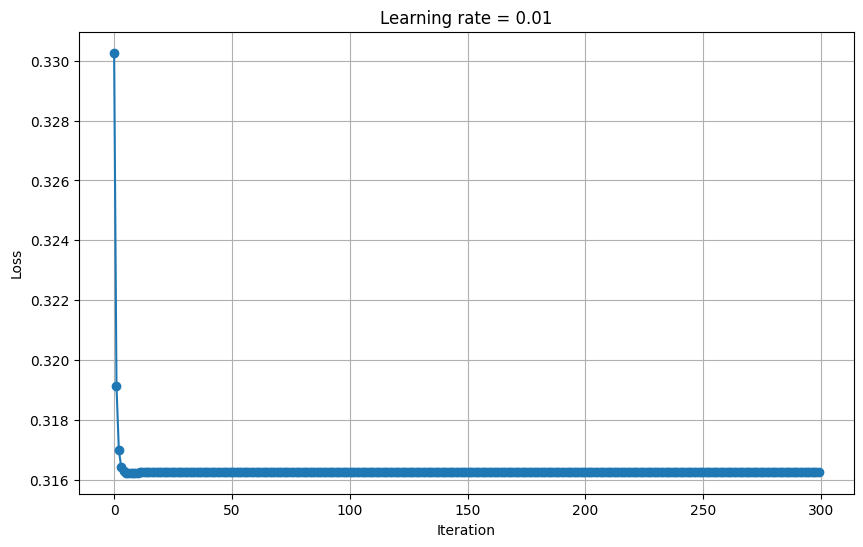

Zero loss iteration for Learning rate = 0.01: None


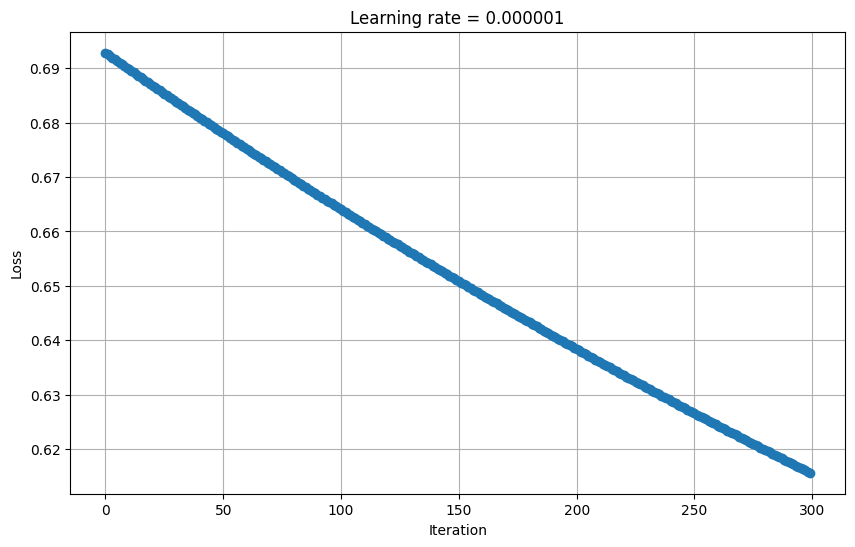

Zero loss iteration for Learning rate = 0.000001: None


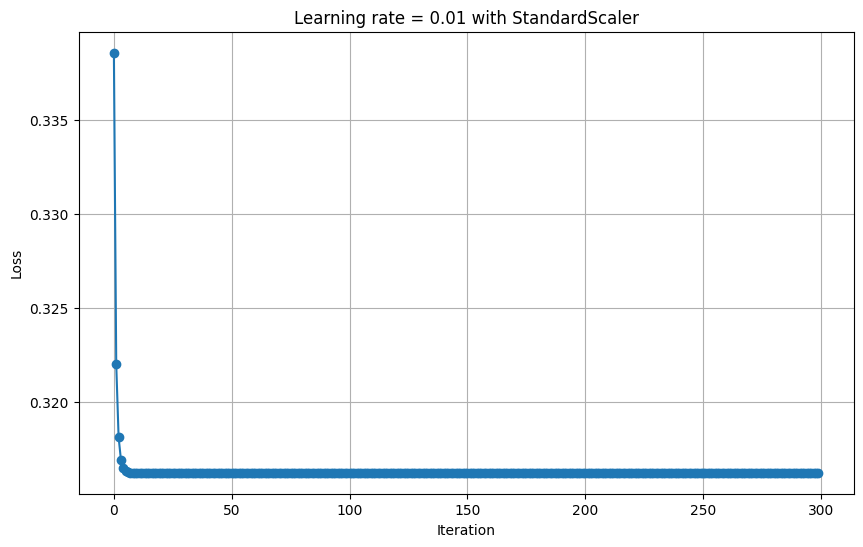

Zero loss iteration for Learning rate = 0.01 with StandardScaler: None


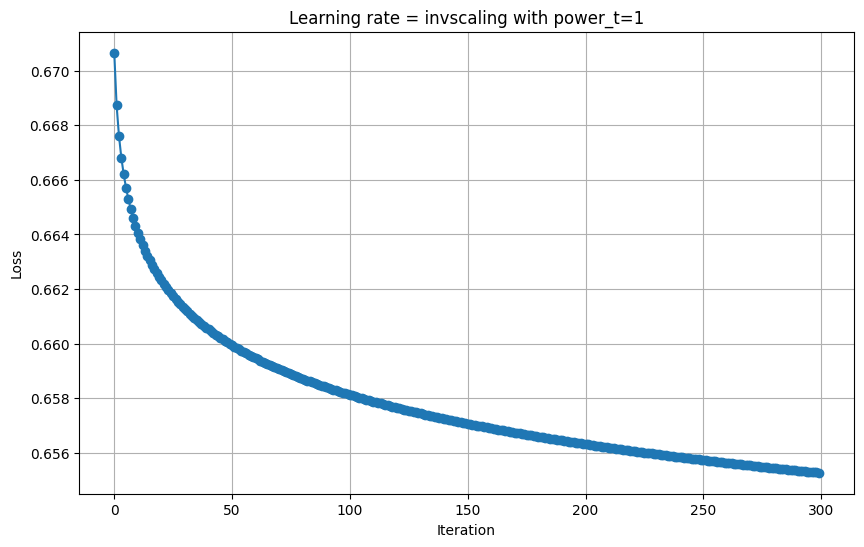

Zero loss iteration for Learning rate = invscaling with power_t=1: None


In [11]:
def plot_loss_curve(losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses)), losses, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.grid(True)
    plt.show()


# Function to train and capture losses
def train_and_plot(x_train, y_train, learning_rate='constant', eta0=0.01, scale_data=False, power_t=0.25, max_iter=300):
    if scale_data:
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)

    clf = SGDClassifier(loss='log_loss', learning_rate=learning_rate, eta0=eta0, power_t=power_t, max_iter=1, tol=None, random_state=10, warm_start=True)
    losses = []
    zero_loss_iteration = None
    
    for i in range(max_iter):
        clf.partial_fit(x_train, y_train, classes=np.unique(y_train))
        y_pred_proba = clf.predict_proba(x_train)
        loss = log_loss(y_train, y_pred_proba)
        losses.append(loss)
        
        if zero_loss_iteration is None and loss == 0:
            zero_loss_iteration = i
    
    return losses, zero_loss_iteration

# Settings and plots

# A. Learning rate 0.01
losses_A, zero_loss_A = train_and_plot(x_train_69, y_train_69, eta0=0.01)
plot_loss_curve(losses_A, 'Learning rate = 0.01')
print(f"Zero loss iteration for Learning rate = 0.01: {zero_loss_A}")

# B. Learning rate 0.000001
losses_B, zero_loss_B = train_and_plot(x_train_69, y_train_69, eta0=0.000001)
plot_loss_curve(losses_B, 'Learning rate = 0.000001')
print(f"Zero loss iteration for Learning rate = 0.000001: {zero_loss_B}")

# C. Learning rate 0.01 with StandardScaler
losses_C, zero_loss_C = train_and_plot(x_train_69, y_train_69, eta0=0.01, scale_data=True)
plot_loss_curve(losses_C, 'Learning rate = 0.01 with StandardScaler')
print(f"Zero loss iteration for Learning rate = 0.01 with StandardScaler: {zero_loss_C}")

# D. Learning rate invscaling with power_t=1
losses_D, zero_loss_D = train_and_plot(x_train_69, y_train_69, learning_rate='invscaling', eta0=0.01, power_t=1)
plot_loss_curve(losses_D, 'Learning rate = invscaling with power_t=1')
print(f"Zero loss iteration for Learning rate = invscaling with power_t=1: {zero_loss_D}")